In [40]:
from PIL import Image
import pytesseract
import numpy as np

## Sample Inferences

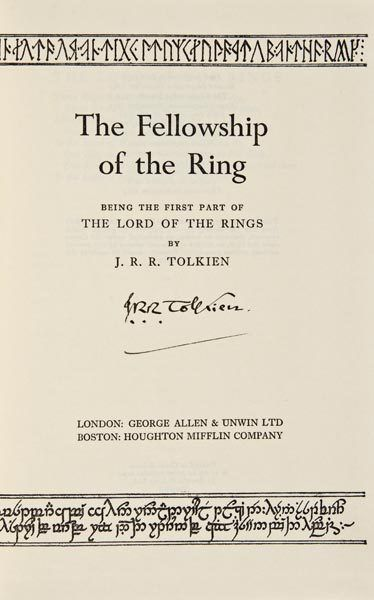

Text image:

BEATRASAINIXG PMNYCENDEYNA BABSNBRANE:

The Fellowship
of the Ring

FING THE PIRST PART OF
‘THE LORD OF THE RINGS

J. RR. TOLKIEN

ee

LONDON: GEORGE ALLEN & UNWIN LD
OSTON; HOUGHTON MIFFLIN COMPANY

aE hah Se eo




In [58]:
image_path = "samples/lotr_cover.jpg"
image = Image.open(image_path)
display(image)
text = pytesseract.image_to_string(image,lang="eng")
print(f"Text image:\n\n{text}")

In [59]:
print(f"Supported languages: {pytesseract.get_languages(config='')}")

Supported languages: ['eng', 'osd', 'spa']


### OCR Latency

Time execution of ocr over original image

In [60]:
print(f"Image shape is: {image.size}")

Image shape is: (374, 600)


In [ ]:
%%timeit -r 4 -n 10
pytesseract.image_to_data(image)

Time execution over image half its original size

In [ ]:
img_shape = image.size
new_size = int(img_shape[0]*0.5), int(img_shape[1]*0.5)
print(f"New image shape: {new_size}\n")
downsized_image = image.resize(new_size)
display(downsized_image)
text = pytesseract.image_to_string(downsized_image)
print(f"Text from downsized image:\n\n{text}")

Time execution over image a quarter its original size

In [ ]:
img_shape = image.size
new_size = int(img_shape[0]*0.25), int(img_shape[1]*0.25)
print(f"New image shape: {new_size}\n")
downsized_image = image.resize(new_size)
display(downsized_image)
text = pytesseract.image_to_string(downsized_image)
print(f"Text from downsized image:\n\n{text}")

In [ ]:
%%timeit -r 4 -n 10
pytesseract.image_to_data(downsized_image)

If comparing results ...

| Extracted Text                                                                                                                                                                                                       | Width | Height | FPS  |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------|--------|------|
| BEATRASAINIXG PMNYCENDEYNA BABSNBRANE:  The Fellowship of the Ring  FING THE PIRST PART OF ‘THE LORD OF THE RINGS  J. RR. TOLKIEN  ee  LONDON: GEORGE ALLEN & UNWIN LD OSTON; HOUGHTON MIFFLIN COMPANY  aE hah Se eo | 374   | 600    | 4,06 |
| PRASAMANC PYRE  The Fellowship of the Ring                                                                                                                                                                           | 187   | 300    | 6,80 |
|                                                                                                                                                                                                                      | 93    | 150    | 9,80 |